#### Corentin Dugué (cmd3864) & Sahil Shah (ss63683)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Problem 1

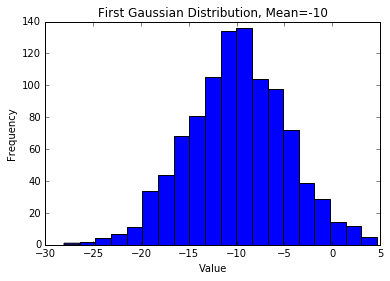

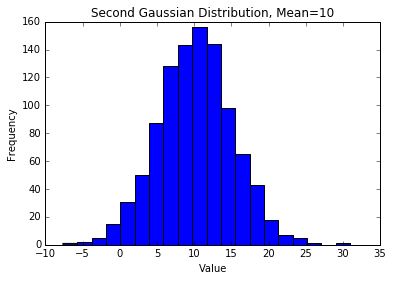

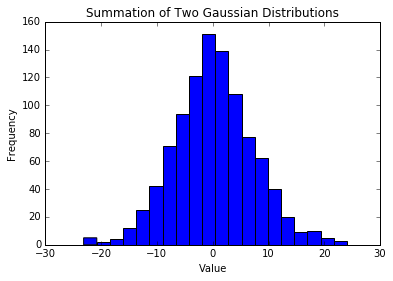

Mean: 0.198722202239
Variance: 51.0244819872


In [4]:
#Number 1
gauss1 = np.random.normal(-10, 5, 1000)
plt.hist(gauss1, 20)
plt.title("First Gaussian Distribution, Mean=-10")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

gauss2 = np.random.normal(10, 5, 1000)
plt.hist(gauss2, 20)
plt.title("Second Gaussian Distribution, Mean=10")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

gauss3 = gauss1+gauss2
plt.hist(gauss3, 20)
plt.title("Summation of Two Gaussian Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Estimation of the mean and the variance of the sum
print('Mean: ' + str(np.mean(gauss3)))
print('Variance: ' + str(np.var(gauss3)))

As expected, the mean of the two distrubtions add up to be around 0 (-10+10). Variances also add up to 5^2 + 5^2 = 50.
We can also observe the bell curve as we added two sets of 1000 points.

# Problem 2

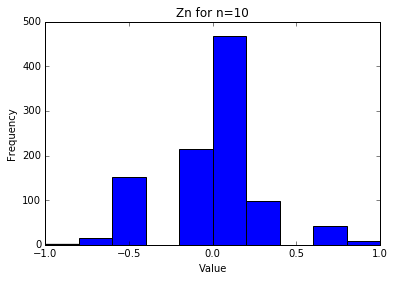

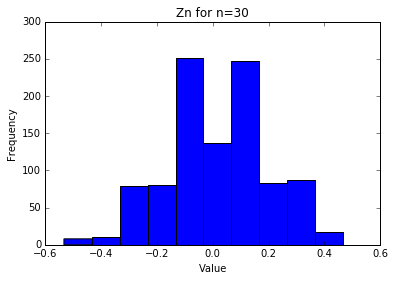

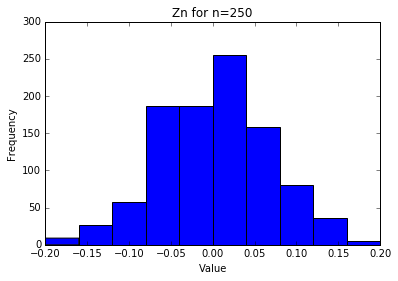

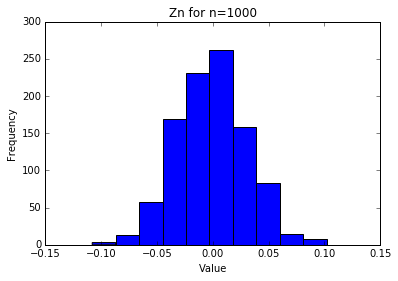

In [5]:
#Number 2
clt1 = (2*np.random.binomial(10, .5, 1000)/10)-1
plt.hist(clt1, 10)
plt.title("Zn for n=10")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
clt2 = (2*np.random.binomial(30, .5, 1000)/30)-1
plt.hist(clt2, 10)
plt.title("Zn for n=30")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
clt3 = (2*np.random.binomial(250, .5, 1000)/250)-1
plt.hist(clt3, 10)
plt.title("Zn for n=250")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
clt4 = (2*np.random.binomial(1000, .5, 1000)/1000)-1
plt.hist(clt4, 10)
plt.title("Zn for n=1000")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

As n gets larger, the histograms follow the bell curve according to the Central Limit Theorem.

# Problem 3

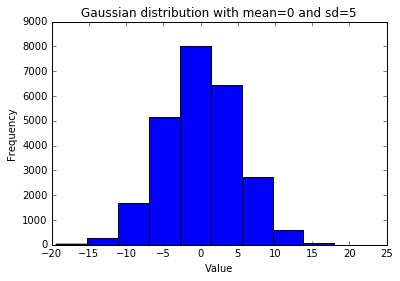

Mean: 0.0343045504956
Standard deviation: 4.96700592763


In [6]:
#Number 3
gauss = np.random.normal(0, 5, 25000)
plt.hist(gauss)
plt.title("Gaussian distribution with mean=0 and sd=5")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
mean = np.sum(gauss)/25000
sd = np.sqrt((np.sum((gauss-mean)**2))/25000)
print('Mean: ' + str(mean))
print('Standard deviation: ' + str(sd))

# Problem 4

In [16]:
#Number 4
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]
multi_gauss= np.random.multivariate_normal(mean, cov, 10000)
meanX = np.sum(multi_gauss[:,0])/10000
meanY = np.sum(multi_gauss[:,1])/10000
print('MeanX: ' + str(meanX))
print('MeanY: ' + str(meanY))

covXX = np.sum((multi_gauss[:,0]-meanX)*(multi_gauss[:,0]-meanX).T)/9999
covYY = np.sum((multi_gauss[:,1]-meanY)*(multi_gauss[:,1]-meanY).T)/9999
covXY = np.sum((multi_gauss[:,0]-meanX)*(multi_gauss[:,1]-meanY).T)/9999
covYX = np.sum((multi_gauss[:,1]-meanY)*(multi_gauss[:,0]-meanX).T)/9999
array = np.array([[covXX,covXY], [covYX,covYY]])
print('Covariance array: ')
print(array)

MeanX: -4.94793219798
MeanY: 4.95358210233
Covariance array: 
[[ 19.78922069   0.30900387]
 [  0.30900387  29.10794689]]


# Problem 5

In [8]:
#Number 5
df=pd.read_csv('PatientData.csv', header=None, na_values='?')
df.columns=list(range(280))
print(df.shape)

(452, 280)


There are 452 patients and 279 features.

In [14]:
df.iloc[:,0:4].describe()

,0,1,2,3
count,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354
std,16.466631,0.497955,37.170340,16.590803
min,0.000000,0.000000,105.000000,6.000000
25%,36.000000,0.000000,160.000000,59.000000
50%,47.000000,1.000000,164.000000,68.000000
75%,58.000000,1.000000,170.000000,79.000000
max,83.000000,1.000000,780.000000,176.000000


First feature has a mean of 46.47 and a max of 83, it is likely to be the age of the patient.

Second feature is boolean and likely to be the gender where 0 is male and 1 is female if we compare with the fourth feature that is supposed to be the weight.

Third feature is likely to be height in cm as the mean is 166.18. If it is the height there seem to be an error inputting data as the max is 780 cm, however 75% is 170 cm, hence it is probably an error.

Fourth feature could be weight in kg as the mean is 68.17 and max 179.

In [10]:
df.isnull().any(axis=0)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11      True
12      True
13      True
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
dtype: bool

There are some missing values, we can replace them by the average of the corresponding feature column.

In [11]:
df = df.fillna(df.mean())

We can test which features strongly influence the patient condition by applying correlation on the dataset. Then we look
at the highest values for the last column which is the condition of the patient. 

In [12]:
corr_mat = df.corr()
print('The four largest correlation coefficients: ')
print(df.corr().loc[279].abs().nlargest(4))
print('The four smallest correlation coefficients: ')
print(df.corr().loc[279].abs().nsmallest(3))

The four largest correlation coefficients: 
279    1.000000
90     0.368876
4      0.323879
92     0.313982
Name: 279, dtype: float64
The four smallest correlation coefficients: 
110    0.000169
124    0.000208
218    0.000552
Name: 279, dtype: float64


The first value is 1 meaning that there is a linear relationship between column 279 and 279 which we expected as it is the correlation between the patient condition itself. 
However, we are interested by features number 90, 4 and 92 as there are the three features with the highest correlation coeffients.
The three features which do not influence significantly the patient conditions are features number 110, 124 and 218 as they have the lowest correlation coefficients.